In [1]:
import openpyxl
import scipy as scipy
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## считываются заданные переменные из excel
wb = openpyxl.load_workbook('test.xlsx') #открываем excel файл
sheet=wb.active #ссылается в файле на активную страницу
k = sheet['B1'].value #проницаемость
mu = sheet['B2'].value #вязкость
ct = sheet['B3'].value #сжимаемость
rw = sheet['B4'].value #радиус скважины
b = sheet['B6'].value #объемный коэф.
pi0 = sheet['B7'].value #начальное давление
m = sheet['B8'].value #пористость
h = sheet['B10'].value #толщина
s = sheet['B11'].value #cкин фактор
r = sheet['B13'].value #расстояние
cs=sheet['B18'].value  #влияние ствола скважины

In [14]:
# Создается массив из длительностей режима и суммируются все дни
srok=[0]*100 # массив для длительности режимов
time=[0]*100
all_days_of_work=0
i_for_days=2
days=sheet.cell(row=i_for_days, column=5).value 
while  str(days)!='None': # цикл, в котором считывается длительность режима
 srok[i_for_days-2]=int(days)
 print(srok[i_for_days-2])
 all_days_of_work=all_days_of_work+days
 i_for_days=i_for_days+1 
 days=sheet.cell(row=i_for_days, column=5).value 
#суммируем все дни:


2
2
4
1
5


In [15]:

i_for_q=2
points_for_q=[0]*100# массив для дебитов
points_for_q[0]=sheet.cell(row=i_for_q, column=4).value 
while  str(points_for_q[i_for_q-2])!='None': # цикл, в которм считываются значения дебитов
     
 print(points_for_q[i_for_q-2])
 i_for_q=i_for_q+1 
 points_for_q[i_for_q-2]=sheet.cell(row=i_for_q, column=4).value
i_for_q=i_for_q-2


7
5
11
12
6


In [16]:
# Задается функция "изменение забойного давления"
def pwf(k,q,b,t,mu,m,ct,rw,pi): 
 rd=0.1/rw   
 td=0.00036*k*t
 td = td /mu/m/ct/(rw**2)+0.01
 E_1=scipy.special.expi(-rd**2/4/td)
 pd=-0.5*E_1
 dp=18.41*b*mu*pd/k/h*q
 return pi-dp   

In [17]:
# вводится массив srok1, чтобы в дальнейшем определить время , с которого скважина начинает работать с конкретным режимом
i=0
srok1=np.array(srok) 
while i<i_for_q-1:
    srok1[i+1]=srok1[i]+srok1[i+1]
    i=i+1

Введите шаг 0.1
начальный момент времени
0
дебит
7
250
конечный момент времени
2

начальный момент времени
2
дебит
5
244.82723731659954
конечный момент времени
4

начальный момент времени
4
дебит
11
241.13240682845637
конечный момент времени
8

начальный момент времени
8
дебит
12
232.58267232216798
конечный момент времени
9

начальный момент времени
9
дебит
6
224.1744687776877
конечный момент времени
14



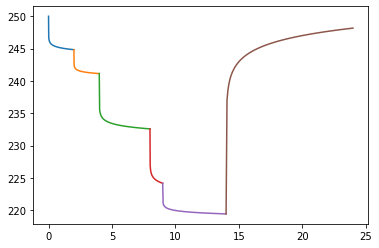

In [20]:
dx =float(input('Введите шаг ')) 
a=int(all_days_of_work//dx) # разбиваем суммарный временной промежуток заданным шагом
Y=[0]*(a)
Y=np.array(Y)
i=0
d0=0 #начальный момент времени
pi=pi0 #начальное забойное давление
while i<i_for_q:
 x=np.linspace(0,srok[i],num=a) # создаем и возвращаем массив для оси X
 print('начальный момент времени')
 print(d0)
 print('дебит')
 print(points_for_q[i])
 print(pi)
 Y=pwf(k,points_for_q[i],b,x,mu,m,ct,rw,pi) #задаем ось Y для графика, вызывая функцию pwf

 pi=min(Y) #конечное забоеное давление для i-го режима
 
 x=np.linspace(d0,srok1[i],num=a) #задаем ось X для графика
 d0=srok1[i] #конечное время для i-го режима
 print('конечный момент времени')
 print(srok1[i])
 i=i+1

 plt.plot(x,Y) #строим график
 print()
    
def pwf_reset(k,q,b,x,mu,m,ct,rw,pi,a,pw):
 x=np.linspace(0,1,num=a)
 x1=np.linspace(3,4,num=a)
 return pw-pwf(k,q,b,x,mu,m,ct,rw,250)+250
pw=min(Y) 
pi=pi0

x=np.linspace(srok1[i-1],srok1[i-1]+10,num=a)
Y=pwf_reset(k,41,b,x,mu,m,ct,rw,pi,a,pw)
plt.plot(x,Y)




In [21]:
i=0

points_for_q1=np.array(points_for_q)
while i<i_for_q-1:
    points_for_q1[i+1]=points_for_q1[i]+points_for_q1[i+1]
    i=i+1

In [33]:
sum(points_for_q1)

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

41.00000000000001

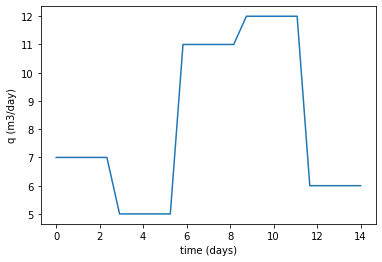

In [40]:
i=0 #график дебитов
j=0
y=[0]*i_for_q*5
a=0
while str(points_for_q[i])!='None':
    while j<5+a:
        y[j]=points_for_q[i]
        j=j+1
    a=j
    i=i+1
d0=0 #начальный момент времени
fig, ax = plt.subplots()
ax.set_xlabel('time (days)')
ax.set_ylabel('q (m3/day)')
x=np.linspace(d0,srok1[i_for_q-1],i_for_q*5)
plt.plot(x,y)
 #конечное время для i-го режима
y=np.array(y)
y=y/5
b=sum(y)
b#МНИМЫЙ ДЕБИТ НАДО ЗАСУНУТЬ ПЕРЕД ГРАФИКОМ ЗАБОЙНОГО ДАВЛЕНИЯ ДЛЯ ВОССТАНОВЛЕНИЯ